**Unidad 2**

*Su tarea consiste en predecir los valores medios de las viviendas en los distritos de California, dadas una serie de características de estos distritos..*

# Configuracion

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import pandas as pd

def load_housing_data():
    csv_path = os.path.join("datasets/housing/housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


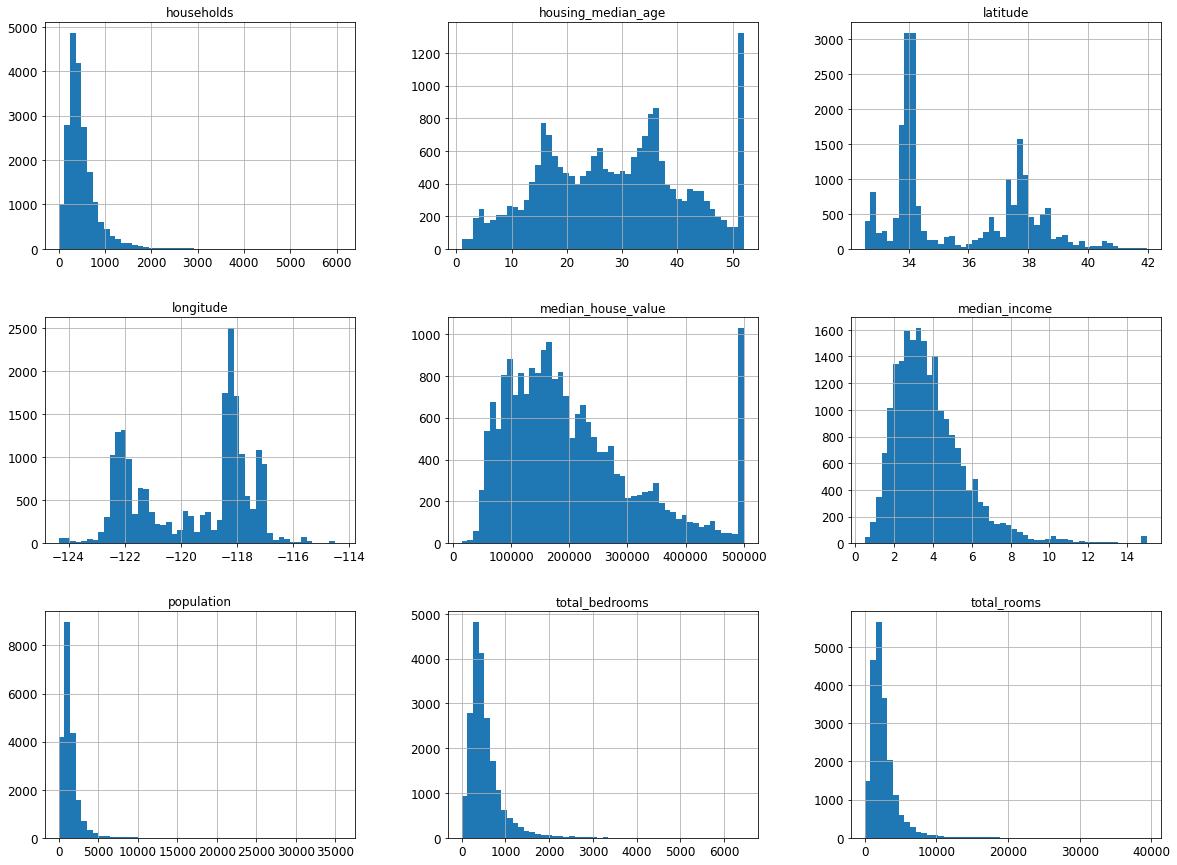

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [18]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [39]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

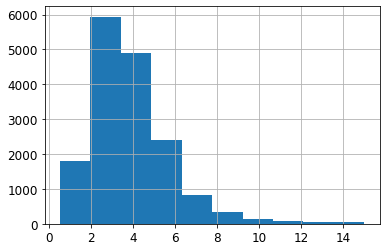

In [40]:
housing["median_income"].hist()

<AxesSubplot:>

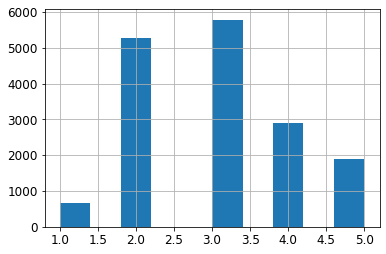

In [41]:
housing["income_cat"].hist()

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[housing.index.intersection(train_index)]
    strat_test_set = housing.loc[housing.index.intersection(test_index)]

In [50]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.354023
2    0.333333
4    0.154406
5    0.113410
1    0.044828
Name: income_cat, dtype: float64

In [51]:
housing["income_cat"].value_counts() / len(housing)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [52]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [53]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039850,0.044828,0.039055,-1.993490,12.491353
2,0.318859,0.333333,0.315168,-1.157559,4.539411
3,0.350594,0.354023,0.356343,1.639851,0.978193
4,0.176296,0.154406,0.174992,-0.739436,-12.416557
5,0.114402,0.113410,0.114441,0.034763,-0.866846


In [54]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Descubrir y visualizar

In [55]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

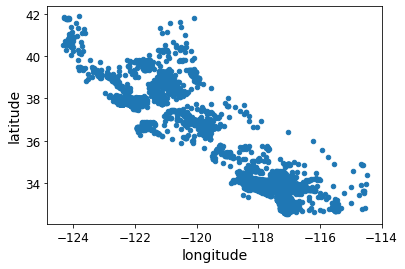

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

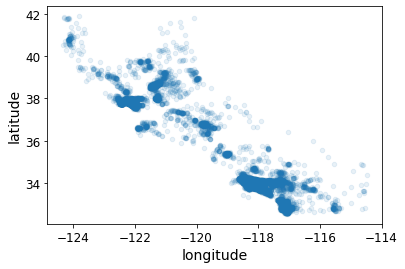

In [59]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

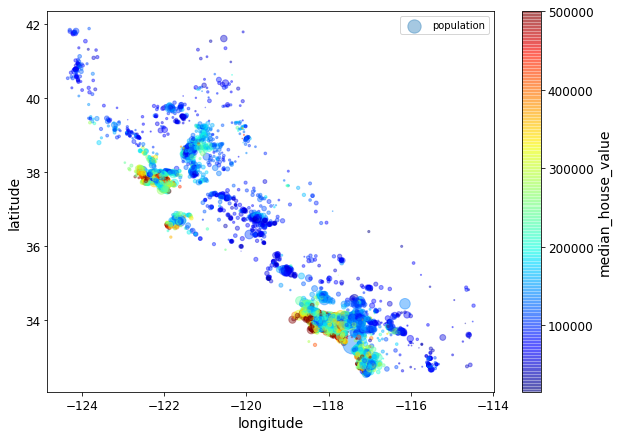

In [61]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [65]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')


C:\Users\yoda\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


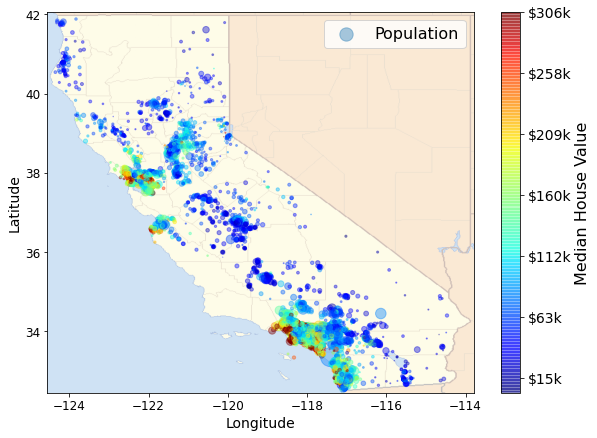

In [64]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [66]:
corr_matrix = housing.corr()

In [68]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.934139,-0.174747,0.059075,0.075723,0.116346,0.066302,0.045243,0.019106
latitude,-0.934139,1.000000,0.049864,-0.039745,-0.067340,-0.117785,-0.077090,-0.110497,-0.178188
housing_median_age,-0.174747,0.049864,1.000000,-0.367757,-0.331032,-0.301378,-0.311260,-0.123223,0.121438
total_rooms,0.059075,-0.039745,-0.367757,1.000000,0.928451,0.853628,0.918505,0.208151,0.135118
total_bedrooms,0.075723,-0.067340,-0.331032,0.928451,1.000000,0.876516,0.980994,-0.002030,0.058084
population,0.116346,-0.117785,-0.301378,0.853628,0.876516,1.000000,0.904429,-0.001106,-0.031987
households,0.066302,-0.077090,-0.311260,0.918505,0.980994,0.904429,1.000000,0.017828,0.072180
median_income,0.045243,-0.110497,-0.123223,0.208151,-0.002030,-0.001106,0.017828,1.000000,0.665871
median_house_value,0.019106,-0.178188,0.121438,0.135118,0.058084,-0.031987,0.072180,0.665871,1.000000


In [67]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.665871
total_rooms           0.135118
housing_median_age    0.121438
households            0.072180
total_bedrooms        0.058084
longitude             0.019106
population           -0.031987
latitude             -0.178188
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

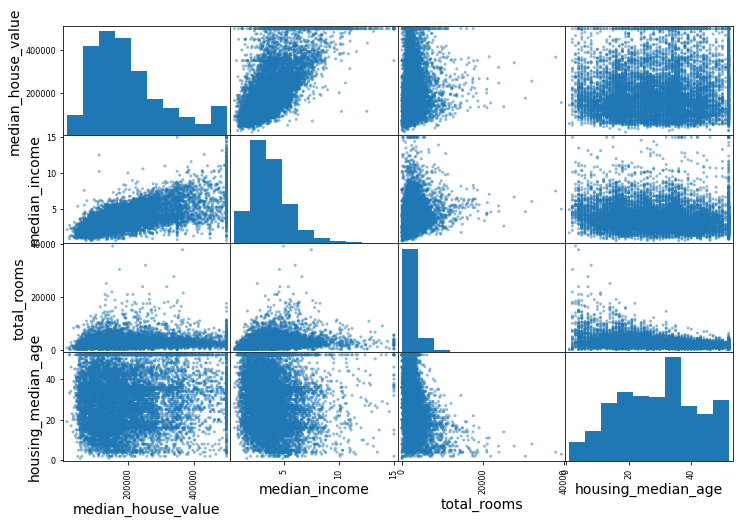

In [70]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


(0.0, 16.0, 0.0, 550000.0)

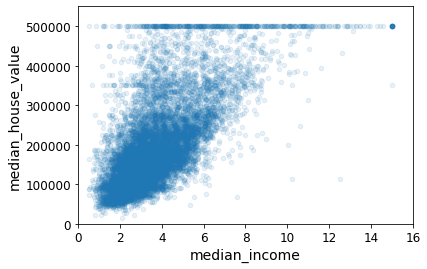

In [72]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


In [73]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [75]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.665871
total_rooms                 0.135118
rooms_per_household         0.123991
housing_median_age          0.121438
households                  0.072180
total_bedrooms              0.058084
longitude                   0.019106
population                 -0.031987
population_per_household   -0.050801
latitude                   -0.178188
bedrooms_per_room          -0.231785
Name: median_house_value, dtype: float64

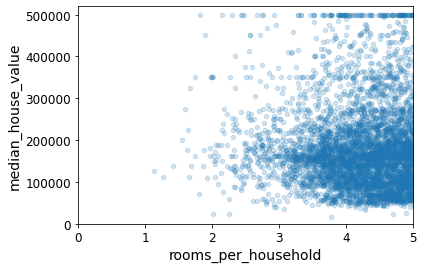

In [76]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [77]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,10570.000000,10570.000000,10570.000000,10570.000000,10466.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10466.000000,10570.000000
mean,-119.145772,35.271164,29.349669,2617.864995,540.599178,1433.504352,501.121287,3.803551,202227.214380,5.407305,0.215863,3.007182
std,1.926945,2.100057,12.735583,2195.798102,424.861702,1161.030723,385.585404,1.859232,113326.588414,2.949006,0.059244,5.928841
min,-124.350000,32.540000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.257500,33.870000,19.000000,1435.250000,295.000000,786.000000,278.250000,2.538350,118500.000000,4.376372,0.176852,2.426307
50%,-118.300000,34.100000,30.000000,2095.500000,433.000000,1167.000000,409.000000,3.495450,174000.000000,5.167558,0.205596,2.826765
75%,-117.890000,37.710000,38.000000,3091.500000,647.000000,1720.000000,599.000000,4.654225,253100.000000,5.987976,0.243342,3.311085
max,-114.470000,41.880000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,0.922414,599.714286


# Preparar los datos

In [78]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [79]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,NaN,928.0,290.0,3.1654,<1H OCEAN


In [80]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [81]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,928.0,290.0,3.1654,<1H OCEAN


In [82]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,433.0,928.0,290.0,3.1654,<1H OCEAN


**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

In [83]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [84]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [85]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [86]:
imputer.statistics_

array([-118.3    ,   34.1    ,   30.     , 2095.5    ,  433.     ,
       1167.     ,  409.     ,    3.49545])

Check that this is the same as manually computing the median of each attribute:

In [87]:
housing_num.median().values

array([-118.3    ,   34.1    ,   30.     , 2095.5    ,  433.     ,
       1167.     ,  409.     ,    3.49545])

Transform the training set:

In [88]:
X = imputer.transform(housing_num)

In [89]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [90]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
4496,-118.22,34.05,34.0,1113.0,433.0,928.0,290.0,3.1654


In [91]:
imputer.strategy

'median'

In [92]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [93]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
13685,INLAND
16365,INLAND
13956,INLAND
2390,INLAND
11176,<1H OCEAN
15614,NEAR BAY
2953,INLAND


**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

In [94]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [95]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.]])

In [96]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`:

In [97]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<10570x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10570 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [98]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [99]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [100]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes:

In [101]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Alternatively, you can use Scikit-Learn's `FunctionTransformer` class that lets you easily create a transformer based on a transformation function (thanks to [Hanmin Qin](https://github.com/qinhanmin2014) for suggesting this code). Note that we need to set `validate=False` because the data contains non-float values (`validate` will default to `False` in Scikit-Learn 0.22).

In [103]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [104]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
13685,-117.24,34.15,26,2041,293,936,375,6,INLAND,5.44267,2.496
16365,-121.31,38.02,24,4157,951,2734,879,2.7981,INLAND,4.72924,3.11035


Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [106]:
housing_num_tr

array([[ 1.00981801, -1.19105409,  0.1295904 , ..., -0.40089876,
        -0.16550533,  0.35806532],
       [-0.24092535,  0.49469384, -0.34155286, ..., -0.05934845,
         0.19039949, -0.23137039],
       [ 0.28843491, -0.49580212, -0.96974387, ..., -0.30570906,
         0.00685908,  0.21298417],
       ...,
       [ 1.42500253, -0.56247012, -1.59793488, ...,  0.31846129,
        -0.04464806, -0.54132929],
       [ 0.58944368, -0.69104411,  0.1295904 , ...,  0.03333914,
         0.13524469, -0.33327341],
       [-1.71483038,  1.18994581,  1.77859179, ..., -0.19119202,
        -0.1722622 ,  0.05280222]])

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [107]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [108]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
housing_prepared

array([[ 1.00981801, -1.19105409,  0.1295904 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.24092535,  0.49469384, -0.34155286, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28843491, -0.49580212, -0.96974387, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.42500253, -0.56247012, -1.59793488, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58944368, -0.69104411,  0.1295904 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.71483038,  1.18994581,  1.77859179, ...,  0.        ,
         1.        ,  0.        ]])

In [110]:
housing_prepared.shape

(10570, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [111]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [112]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [113]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [114]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 1.00981801, -1.19105409,  0.1295904 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.24092535,  0.49469384, -0.34155286, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28843491, -0.49580212, -0.96974387, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.42500253, -0.56247012, -1.59793488, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58944368, -0.69104411,  0.1295904 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.71483038,  1.18994581,  1.77859179, ...,  0.        ,
         1.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [115]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Seleccionar y entrenar a model 

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [204037.46176615  57719.50372478 193734.78557917 228263.75957251
 117922.32799323]


Compare against the actual values:

In [118]:
print("Labels:", list(some_labels))

Labels: [196900.0, 46300.0, 254500.0, 140200.0, 92100.0]


In [119]:
some_data_prepared

array([[ 1.00981801, -1.19105409,  0.1295904 , -0.30325944, -0.1620804 ,
        -0.42852259, -0.10146426, -0.50638925, -0.40089876, -0.16550533,
         0.35806532,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.24092535,  0.49469384, -0.34155286, -0.3510803 , -0.39855434,
         0.02282188, -0.38416468, -1.03254523, -0.05934845,  0.19039949,
        -0.23137039,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.28843491, -0.49580212, -0.96974387,  1.80996741,  2.33035492,
         2.60599372,  2.49471117, -0.41355084, -0.30570906,  0.00685908,
         0.21298417,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.98905878, -0.53389812, -0.26302898, -0.26272556, -0.58300401,
        -0.42852259, -0.32710588,  1.1814301 ,  0.01199152, -0.0862237 ,
        -1.06699989,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.12319245,  1.3089958 , -0

In [120]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69421.91799820146

In [121]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49931.65962767729

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [123]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Ajuste fino del modelo

In [126]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [127]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [65129.98179274 69336.55936082 70970.4728923  67272.43654626
 67749.103874   76470.02517762 65722.31710888 71603.28701861
 74471.70415416 70539.11723705]
Mean: 69926.50051624297
Standard deviation: 3472.2942544692223


In [128]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 65618.23880369  68668.13870926 147837.24758025  73470.90317552
  69273.30079501  73371.59908425  65110.8684208   70835.20813406
  71599.81070046  69178.99644288]
Mean: 77496.43118461873
Standard deviation: 23599.626170362917


**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [132]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [133]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21851.78171346723

In [134]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48732.89266024 51781.35674529 52311.43580528 51163.47378172
 51974.575686   56236.7928446  52350.50403425 51726.49010903
 56496.7347079  52571.33883121]
Mean: 52534.55952055296
Standard deviation: 2176.161681549141


In [135]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      77496.431185
std       24876.190209
min       65110.868421
25%       68795.853143
50%       70054.254465
75%       72928.651988
max      147837.247580
dtype: float64

In [136]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111952.66004105275

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [138]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [139]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [140]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63413.18887213685 {'max_features': 2, 'n_estimators': 3}
55377.84106050748 {'max_features': 2, 'n_estimators': 10}
52966.3296318041 {'max_features': 2, 'n_estimators': 30}
58154.7682249877 {'max_features': 4, 'n_estimators': 3}
51554.128843644794 {'max_features': 4, 'n_estimators': 10}
49565.759885548745 {'max_features': 4, 'n_estimators': 30}
57635.96798778624 {'max_features': 6, 'n_estimators': 3}
51560.60164359427 {'max_features': 6, 'n_estimators': 10}
49733.059325286464 {'max_features': 6, 'n_estimators': 30}
59060.99779450824 {'max_features': 8, 'n_estimators': 3}
51971.13843708823 {'max_features': 8, 'n_estimators': 10}
49249.85029395775 {'max_features': 8, 'n_estimators': 30}
63386.503631188156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55042.71877363406 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58737.08418388199 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52213.27429169077 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [141]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.148981,0.043556,0.006586,0.001492,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.699164e+09,-3.801388e+09,...,-4.021233e+09,2.643498e+08,18,-1.130589e+09,-1.043012e+09,-1.060096e+09,-1.114967e+09,-1.116559e+09,-1.093045e+09,3.473317e+07
1,0.457819,0.084651,0.019034,0.004163,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.789694e+09,-2.910669e+09,...,-3.066705e+09,2.105342e+08,11,-5.792448e+08,-5.642231e+08,-5.746888e+08,-5.786075e+08,-5.554080e+08,-5.704344e+08,9.240101e+06
2,1.572012,0.186572,0.063798,0.019175,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.544910e+09,-2.674955e+09,...,-2.805432e+09,2.091622e+08,9,-4.562095e+08,-4.294108e+08,-4.315020e+08,-4.300659e+08,-4.135969e+08,-4.321570e+08,1.367729e+07
3,0.219439,0.015913,0.008190,0.001147,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.391163e+09,-3.513256e+09,...,-3.381977e+09,1.432029e+08,14,-9.651638e+08,-9.557665e+08,-8.324327e+08,-8.684333e+08,-9.068627e+08,-9.057318e+08,5.059812e+07
4,0.766983,0.126001,0.019223,0.001162,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.479946e+09,-2.598692e+09,...,-2.657828e+09,1.601733e+08,5,-5.185767e+08,-5.019326e+08,-4.720009e+08,-4.851307e+08,-4.868214e+08,-4.928925e+08,1.596850e+07
5,2.587800,0.531297,0.070828,0.023345,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.201053e+09,-2.383898e+09,...,-2.456765e+09,1.767440e+08,2,-3.948762e+08,-3.836755e+08,-3.702822e+08,-3.760876e+08,-3.560247e+08,-3.761893e+08,1.301354e+07
6,0.300212,0.040076,0.007784,0.001330,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.907989e+09,-3.214175e+09,...,-3.321905e+09,2.399359e+08,13,-9.150384e+08,-8.602140e+08,-7.941262e+08,-8.614352e+08,-8.215687e+08,-8.504765e+08,4.097357e+07
7,0.932215,0.054486,0.020386,0.003068,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.355316e+09,-2.494612e+09,...,-2.658496e+09,2.344843e+08,6,-4.910757e+08,-4.780365e+08,-4.606163e+08,-4.886905e+08,-4.578305e+08,-4.752499e+08,1.383076e+07
8,2.567592,0.264022,0.053379,0.003463,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.219745e+09,-2.365268e+09,...,-2.473377e+09,2.052104e+08,3,-3.834623e+08,-3.780761e+08,-3.586597e+08,-3.765045e+08,-3.584404e+08,-3.710286e+08,1.044703e+07
9,0.314407,0.040413,0.006425,0.001026,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.081588e+09,-3.322985e+09,...,-3.488201e+09,3.180044e+08,16,-9.142958e+08,-9.097135e+08,-8.916200e+08,-8.465362e+08,-8.718578e+08,-8.868047e+08,2.509470e+07


In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [143]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48549.23199906094 {'max_features': 7, 'n_estimators': 180}
50956.999941725786 {'max_features': 5, 'n_estimators': 15}
50116.77967592849 {'max_features': 3, 'n_estimators': 72}
50213.9825807516 {'max_features': 5, 'n_estimators': 21}
48697.82809378833 {'max_features': 7, 'n_estimators': 122}
50116.5558720802 {'max_features': 3, 'n_estimators': 75}
50003.108402100486 {'max_features': 3, 'n_estimators': 88}
48815.1577578263 {'max_features': 5, 'n_estimators': 100}
50017.271624350426 {'max_features': 3, 'n_estimators': 150}
65001.04523903538 {'max_features': 5, 'n_estimators': 2}


In [144]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.63740823e-02, 6.90462635e-02, 4.65542420e-02, 1.61295341e-02,
       1.54485078e-02, 1.50668826e-02, 1.36901864e-02, 3.46440426e-01,
       6.33575669e-02, 1.24644613e-01, 4.31467508e-02, 9.83409903e-03,
       1.45318722e-01, 6.69557009e-05, 2.85492823e-03, 2.02624064e-03])

In [145]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34644042573959216, 'median_income'),
 (0.14531872161739354, 'INLAND'),
 (0.12464461273509099, 'pop_per_hhold'),
 (0.08637408228978523, 'longitude'),
 (0.06904626350512316, 'latitude'),
 (0.06335756690240862, 'rooms_per_hhold'),
 (0.04655424202499185, 'housing_median_age'),
 (0.043146750818124004, 'bedrooms_per_room'),
 (0.016129534070577305, 'total_rooms'),
 (0.015448507775611568, 'total_bedrooms'),
 (0.015066882571724676, 'population'),
 (0.013690186352228271, 'households'),
 (0.009834099025742556, '<1H OCEAN'),
 (0.002854928230514112, 'NEAR BAY'),
 (0.002026240640174586, 'NEAR OCEAN'),
 (6.695570091739253e-05, 'ISLAND')]

In [146]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
final_rmse

47940.27513196454

We can compute a 95% confidence interval for the test RMSE:

In [148]:
from scipy import stats

In [149]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([44726.80984398, 50951.4714276 ])

We could compute the interval manually like this:

In [150]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(44726.8098439764, 50951.47142760149)

Alternatively, we could use a z-scores rather than t-scores:

In [151]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(44728.354146650454, 50950.11574853125)